# Cart Pole - Policy Gradient

![title](cart_pole_pic.png)

A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

# Load Packages

In [1]:
import swat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import time
import gym

# Make Environment

In [2]:
env = gym.make('CartPole-v0')

In [3]:
#DocString
?env.env

In [4]:
# Env Actions
directions = {"Left":0,"Right":1}
env.action_space

Discrete(2)

In [5]:
# Env Observation
obs = {"CartPosition":0,"CartVelocity":1,"PoleAngle":2,"PoleAngularVelocity":3}
env.observation_space

Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)

In [6]:
# Env Start
# All observations are assigned a uniform random value in [-0.05..0.05]
env.reset()

array([ 0.01692499, -0.0456696 , -0.0347911 , -0.01392683])

In [7]:
# Push the Cart Left Policy
env.reset()
for i in range(40):
    env.step(0)
    env.render()
    time.sleep(0.02)
    
env.close()

C:\ProgramData\Anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


# Connect to CAS

In [8]:
conn = swat.CAS("server", 30571, "student", "Metadata0")

# Create SAS RL Environment URL

In [9]:
cmd_data = subprocess.check_output(['ipconfig','/all']).decode('utf-8').split('\n')
ip_data = [item for item in cmd_data if "IPv4 Address" in item]
computer_id = ip_data[0].split(": ")[1].split("(")[0]
sasrl_env_port = "10200"
sasrl_env_url = computer_id + ":" + sasrl_env_port

# Load the RL Action Set

In [10]:
conn.loadactionset('reinforcementLearn')

NOTE: Added action set 'reinforcementLearn'.


[actionset]

 'reinforcementLearn'

+ Elapsed: 0.277s, user: 0.702s, sys: 0.976s, mem: 0.22mb

# Train the Agent - Policy Gradient

In [11]:
# results = conn.reinforcementLearn.rlTrainPG(
    
#     # RL Arguments
#     environment=dict(type='remote', url=sasrl_env_url, name='CartPole-v0', render=False, seed=802),
#     pgAlg = dict(type='actorCritic', entropyCoef=0.01, GAELambda=0.9, nRollouts=5),
#     gamma = 0.99,
#     numEpisodes = 5000,
    
#     # NN Arguments
#     actorModel=[{'type':'FC', 'n':128, 'act':'RELU'},
#                 {'type':'FC', 'n':128, 'act':'RELU'}],
#     actorOptimizer=dict(method='ADAM', beta1=0.9, beta2=0.999, learningRate=0.001, miniBatchSize=256),
#     criticModel=[{'type':'FC', 'n':128, 'act':'RELU'},
#                  {'type':'FC', 'n':128, 'act':'RELU'}],    
#     criticOptimizer=dict(method='ADAM', beta1=0.9, beta2=0.999, learningRate=0.001, miniBatchSize=256),
    
#     # Test Arguments
#     testInterval = 100,
#     numTestEpisodes = 1,
    
#     # Other Arguments
#     modelOut=dict(name='pg_weights', replace=True),
#     seed = 919,
    
# )

# Save the Model

In [12]:
# Add a CASlib
conn.table.addCaslib(name="mycl", path="/workshop/winsas/VOSI", dataSource="PATH", activeOnAdd=False)

NOTE: Cloud Analytic Services added the caslib 'mycl'.


,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,mycl,PATH,,/workshop/winsas/VOSI/,,0.0,1.0,0.0,0.0,0.0,0.0


In [13]:
# Save Optimization History
# pd.DataFrame(results["OptIterHistory"]).to_csv("D:/Workshop/Winsas/VOSI/cartpole_pg_opthist.csv", index=False)

In [14]:
# Save DQN Weights
# conn.table.save(caslib = 'mycl', table = 'pg_weights', name = 'cartpole_pg_weights', replace = True)
# conn.table.attribute(caslib = 'CASUSER', table = 'cartpole_pg_weights_attr', name = 'pg_weights', task='convert')
# conn.table.save(caslib = 'mycl', table = 'cartpole_pg_weights_attr', name = 'cartpole_pg_weights_attr', replace = True)

# Load the Model

In [15]:
# Load Optimization History
results = pd.read_csv("D:/Workshop/Winsas/VOSI/cartpole_pg_opthist.csv")

In [16]:
# Load DQN Weights
conn.table.loadTable(caslib = 'mycl', path="cartpole_pg_weights.sashdat", casOut=dict(name="pg_weights", replace=True))
conn.table.loadTable(caslib = 'mycl', path="cartpole_pg_weights_attr.sashdat", casOut=dict(name="pg_weights_attr", replace=True))
conn.table.attribute(caslib='CASUSER', task='ADD', name='pg_weights', attrtable='pg_weights_attr')

NOTE: Cloud Analytic Services made the file cartpole_pg_weights.sashdat available as table PG_WEIGHTS in caslib CASUSER(student).
NOTE: Cloud Analytic Services made the file cartpole_pg_weights_attr.sashdat available as table PG_WEIGHTS_ATTR in caslib CASUSER(student).


+ Elapsed: 0.00057s, user: 0.000532s, mem: 0.291mb

# View Results

In [17]:
results

,Episode,TrainStep,AvgReward,ActorGradNorm,Entropy,ActorLoss,CriticGradNorm,CriticLoss
0,0,0,11.0,0.471376,0.692688,0.703018,4.511387,0.992276
1,500,100,9.0,0.827010,0.517802,0.298046,7.488550,11.040113
2,1000,200,9.0,1.944562,0.676135,-0.173741,12.293354,14.403647
3,1500,300,105.0,0.388455,0.357922,-0.140806,10.907806,11.510279
4,2000,400,46.0,0.137629,0.222261,0.044878,7.730752,2.440245
5,2500,500,200.0,0.491261,0.199372,-0.229124,16.666860,3.892320
6,3000,600,28.0,0.191918,0.174773,0.065700,6.360128,0.991019
7,3500,700,52.0,0.660738,0.156220,0.004682,7.167904,0.628499
8,4000,800,38.0,0.163520,0.143769,0.011060,5.200413,0.398468
9,4500,900,31.0,0.108402,0.076967,0.007344,2.296562,0.599451


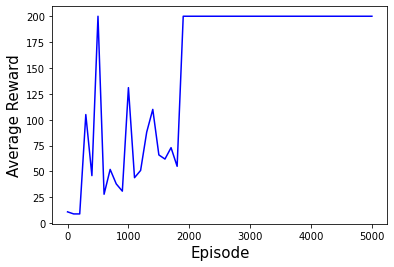

In [18]:
plt.plot(results['TrainStep'],results['AvgReward'], color="blue")
plt.xlabel("Episode", fontsize=15)
plt.ylabel("Average Reward", fontsize=15)
plt.show()

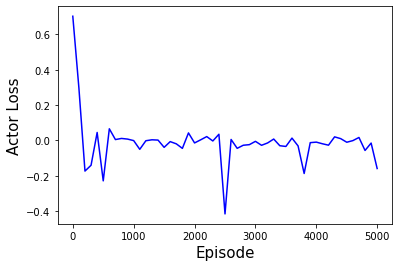

In [19]:
plt.plot(results['TrainStep'],results['ActorLoss'], color="blue")
plt.xlabel("Episode", fontsize=15)
plt.ylabel("Actor Loss", fontsize=15)
plt.show()

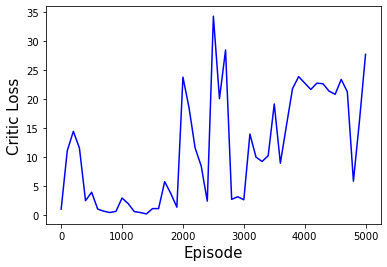

In [20]:
plt.plot(results['TrainStep'],results['CriticLoss'], color="blue")
plt.xlabel("Episode", fontsize=15)
plt.ylabel("Critic Loss", fontsize=15)
plt.show()

# Score the Model

In [21]:
conn.reinforcementLearn.rlScore(
    environment=dict(type='remote', url=sasrl_env_url, name='CartPole-v0', 
                     render=True, renderFreq=10, renderSleep=0.02, seed=802),
    model='pg_weights',
    numEpisodes=1,
    logFreq=1,
    casout=dict(name='scored_table', replace=True)
)

         Episode=        1 Step=        1 LastReward=     0 AverageReward=     1
         Episode=        1 Step=        2 LastReward=     0 AverageReward=     2
         Episode=        1 Step=        3 LastReward=     0 AverageReward=     3
         Episode=        1 Step=        4 LastReward=     0 AverageReward=     4
         Episode=        1 Step=        5 LastReward=     0 AverageReward=     5
         Episode=        1 Step=        6 LastReward=     0 AverageReward=     6
         Episode=        1 Step=        7 LastReward=     0 AverageReward=     7
         Episode=        1 Step=        8 LastReward=     0 AverageReward=     8
         Episode=        1 Step=        9 LastReward=     0 AverageReward=     9
         Episode=        1 Step=       10 LastReward=     0 AverageReward=    10
         Episode=        1 Step=       11 LastReward=     0 AverageReward=    11
         Episode=        1 Step=       12 LastReward=     0 AverageReward=    12
         Episode=        1 S

,Property,Value
0,Number of State Variables,4
1,Number of Actions,2
2,Algorithm,ACTORCRITIC
3,Optimizer,ADAM


# Download Final Test

In [22]:
scored_table = conn.CASTable(name = "scored_table")
df = scored_table.to_frame()
df

,_Step_,_Episode_,_State_0,_State_1,_State_2,_State_3,_Action_,_Reward_,_Done_
0,0.0,1.0,-0.024137,-0.035394,-0.013526,0.010430,0.0,1.0,0.0
1,1.0,1.0,-0.024845,-0.230319,-0.013317,0.298815,0.0,1.0,0.0
2,2.0,1.0,-0.029451,-0.425249,-0.007341,0.587268,0.0,1.0,0.0
3,3.0,1.0,-0.037956,-0.620267,0.004404,0.877629,1.0,1.0,0.0
4,4.0,1.0,-0.050361,-0.425205,0.021957,0.586334,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
195,195.0,1.0,0.038858,0.157309,0.005245,-0.228893,0.0,1.0,0.0
196,196.0,1.0,0.042005,-0.037888,0.000667,0.065440,1.0,1.0,0.0
197,197.0,1.0,0.041247,0.157225,0.001976,-0.227032,0.0,1.0,0.0
198,198.0,1.0,0.044391,-0.037926,-0.002565,0.066273,1.0,1.0,0.0


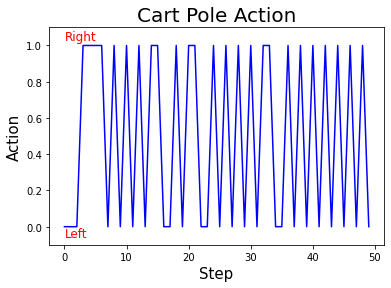

In [23]:
plt.plot(df["_Action_"][:50], color="blue")
plt.title("Cart Pole Action", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.ylabel("Action", fontsize=15)
plt.ylim(-0.1,1.1)
plt.text(0,-0.06,"Left", color="red", fontsize=12)
plt.text(0,1.03,"Right", color="red", fontsize=12)
plt.show()

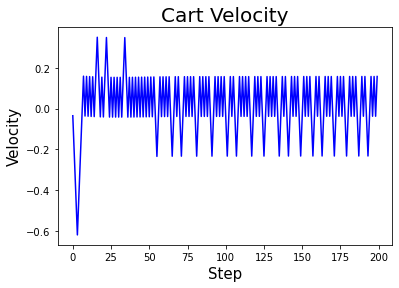

In [24]:
plt.plot(df["_State_1"], color="blue")
plt.title("Cart Velocity", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.ylabel("Velocity", fontsize=15)
plt.show()

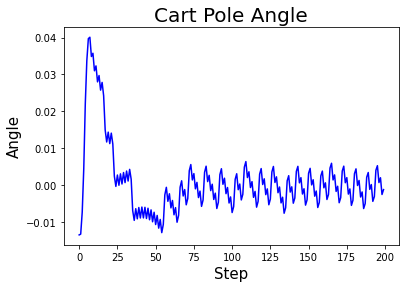

In [25]:
plt.plot(df["_State_2"], color="blue")
plt.title("Cart Pole Angle", fontsize=20)
plt.xlabel("Step", fontsize=15)
plt.ylabel("Angle", fontsize=15)
plt.show()

# End the Session

In [26]:
conn.session.endSession()

+ Elapsed: 0.000293s, user: 0.000134s, sys: 0.000138s, mem: 0.204mb